In [2076]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2077]:
train_df = pd.read_csv('/Users/aasthaprajapati/Desktop/train.csv')
test_df = pd.read_csv('/Users/aasthaprajapati/Desktop/test.csv')
gender_submission_df = pd.read_csv('/Users/aasthaprajapati/Desktop/gender_submission.csv')

In [2078]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2079]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [2080]:
gender_submission_df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


### Here starts the EDA and data handling, encoding and cleaning.

In [2081]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### finding uniques values for all columns and the number of times each have occured

In [2082]:
train_df.info() ## there are null values too

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [2083]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [2084]:
train_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [2085]:
train_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [2086]:
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [2087]:
train_df['Age'].isnull().value_counts()

False    714
True     177
Name: Age, dtype: int64

In [2088]:
train_df['Age'].fillna(value=train_df['Age'].mean(), inplace=True)

In [2089]:
train_df['Age'].isnull().value_counts()

False    891
Name: Age, dtype: int64

In [2090]:
train_df['Embarked'].fillna(value='S', inplace = True)

In [2091]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [2092]:
train_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [2093]:
train_df['Cabin'].fillna(value='Z', inplace=True)

In [2094]:
train_df['Family_size'] = train_df['SibSp'] + train_df['Parch']

In [2095]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,Z,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,Z,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,Z,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,Z,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,Z,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,0


cleaning Name column

In [2096]:
type(train_df.columns)

pandas.core.indexes.base.Index

In [2097]:
train_df['marriage_status'] = train_df.Name.str.extract(pat = '([A-Z].)')

In [2098]:
train_df=train_df.drop(columns=['marriage_status'])

In [2099]:
len(train_df['Name'])

891

In [2100]:
train_df['Name'][1].split()[1]

'Mrs.'

In [2101]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,Z,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,Z,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,Z,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,Z,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,Z,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,0


In [2102]:
train_df['Designation'] = train_df.Name.str.extract(' ([A-Za-z]+)\.')

In [2103]:
train_df['Designation'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Designation, dtype: int64

In [2104]:
train_df['Designation'] = train_df['Designation'].replace('Ms', 'Miss')
train_df['Designation'] = train_df['Designation'].replace('Mlle', 'Miss')
train_df['Designation'] = train_df['Designation'].replace('Mme', 'Mrs')

In [2105]:
encoding = {"Designation" : {"Mr" : 1, "Miss" : 2, "Mrs": 3, "Master": 4, "Dr":0, "Rev":0,"Major":0, "Col":0,"Countess":0,"Capt":0,"Sir":0,"Lady":0, "Don":0, "Jonkheer":0}}

In [2106]:
encoding

{'Designation': {'Mr': 1,
  'Miss': 2,
  'Mrs': 3,
  'Master': 4,
  'Dr': 0,
  'Rev': 0,
  'Major': 0,
  'Col': 0,
  'Countess': 0,
  'Capt': 0,
  'Sir': 0,
  'Lady': 0,
  'Don': 0,
  'Jonkheer': 0}}

In [2107]:
train_df = train_df.replace(encoding)

In [2108]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Designation
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,Z,S,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,Z,S,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,Z,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,Z,S,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,0,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,Z,S,3,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,0,1


In [2109]:
for a in [train_df]:
    a['Married'] = 0
    a['Married'].loc[a['Designation'] == 3] = 1 

/var/folders/1n/9fbztsyx07jgppwjlx5rfyzm0000gn/T/ipykernel_6492/1437369227.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['Married'].loc[a['Designation'] == 3] = 1


In [2110]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Designation,Married
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,Z,S,1,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,1,3,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,Z,S,0,2,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,1,3,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,Z,S,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,Z,S,0,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,0,2,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,Z,S,3,2,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,0,1,0


In [2111]:
train_df=train_df.drop(columns=['Name', 'Ticket', 'Fare'])

In [2112]:
# train_df['Sex'] = train_df['Sex'].astype('category')
# train_df['Sex'] = train_df['Sex'].cat.codes

In [2113]:
# train_df['Age'] = (train_df['Age'] - train_df['Age'].min())/(train_df['Age'].max()-train_df['Age'].min())

In [2114]:
# train_df['Pclass'] = train_df['Pclass'].astype('category')
# train_df['Pclass'] = train_df['Pclass'].cat.codes

In [2115]:
# train_df['Embarked'] = train_df['Embarked'].astype('category')
# train_df['Embarked'] = train_df['Embarked'].cat.codes

In [2116]:
train_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked,Family_size,Designation,Married
0,1,0,3,male,22.000000,1,0,Z,S,1,1,0
1,2,1,1,female,38.000000,1,0,C85,C,1,3,1
2,3,1,3,female,26.000000,0,0,Z,S,0,2,0
3,4,1,1,female,35.000000,1,0,C123,S,1,3,1
4,5,0,3,male,35.000000,0,0,Z,S,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,Z,S,0,0,0
887,888,1,1,female,19.000000,0,0,B42,S,0,2,0
888,889,0,3,female,29.699118,1,2,Z,S,3,2,0
889,890,1,1,male,26.000000,0,0,C148,C,0,1,0


In [2117]:
train_df['Cabin'].unique()

array(['Z', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [2118]:
for i in [train_df]:
    i['Cabin'] = i['Cabin'].str[0]
custom_encoding = {'Cabin' : {'A': 0, 'B':1, 'C':2, 'D':3,'E':4, 'F':5, 'G': 6, 'T':7, 'Z':8}}
train_df = train_df.replace(custom_encoding)

In [2119]:
train_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked,Family_size,Designation,Married
0,1,0,3,male,22.000000,1,0,8,S,1,1,0
1,2,1,1,female,38.000000,1,0,2,C,1,3,1
2,3,1,3,female,26.000000,0,0,8,S,0,2,0
3,4,1,1,female,35.000000,1,0,2,S,1,3,1
4,5,0,3,male,35.000000,0,0,8,S,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,8,S,0,0,0
887,888,1,1,female,19.000000,0,0,1,S,0,2,0
888,889,0,3,female,29.699118,1,2,8,S,3,2,0
889,890,1,1,male,26.000000,0,0,2,C,0,1,0


### Done with all the data cleaning and encoding and normalizing

### help
PClass = 3rd class : 0, 1st class: 1, 2nd class : 2
Survived = No : 0, Yes: 1
Sex = Male :1, Female:0
Embarked = S : 2, C : 0, Q : 1
Designation = Mr = 1, Miss =2, Mrs=3, Master =4, others =5
Married = 0 : no, 1: yes
Cabin = 'A': 0, 'B':1, 'C':2, 'D':3,'E':4, 'F':5, 'G': 6, 'T':7, 'Z':8

## Fun with Correlations

In [2120]:
train_df.corr()['Survived']

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.069809
SibSp         -0.035322
Parch          0.081629
Cabin         -0.301116
Family_size    0.016639
Designation    0.467333
Married        0.341994
Name: Survived, dtype: float64

In [2121]:
train_df[['Sex', 'Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [2122]:
train_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

implies: ==> 74% females have survived 26% have died.....similarly, 18% males have survived and rest are dead

In [2123]:
train_df[['Sex', 'Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [2124]:
train_df[['Pclass', 'Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [2125]:
train_df[['Age', 'Survived']].groupby(['Age']).mean()

,Survived
Age,
0.42,1.0
0.67,1.0
0.75,1.0
0.83,1.0
0.92,1.0
...,...
70.00,0.0
70.50,0.0
71.00,0.0


In [2126]:
train_df[['Married', 'Survived']].groupby(['Married']).mean()

,Survived
Married,
0,0.316340
1,0.793651


In [2127]:
train_df = train_df.drop(columns='Designation')

In [2128]:
train_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked,Family_size,Married
0,1,0,3,male,22.000000,1,0,8,S,1,0
1,2,1,1,female,38.000000,1,0,2,C,1,1
2,3,1,3,female,26.000000,0,0,8,S,0,0
3,4,1,1,female,35.000000,1,0,2,S,1,1
4,5,0,3,male,35.000000,0,0,8,S,0,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,8,S,0,0
887,888,1,1,female,19.000000,0,0,1,S,0,0
888,889,0,3,female,29.699118,1,2,8,S,3,0
889,890,1,1,male,26.000000,0,0,2,C,0,0


In [2129]:
train_df[['Family_size', 'Survived']].groupby(['Family_size']).mean()

,Survived
Family_size,
0,0.303538
1,0.552795
2,0.578431
3,0.724138
4,0.200000
5,0.136364
6,0.333333
7,0.000000
10,0.000000


In [2130]:
train_df[['Cabin', 'Survived']].groupby(['Cabin']).mean()

,Survived
Cabin,
0,0.466667
1,0.744681
2,0.593220
3,0.757576
4,0.750000
5,0.615385
6,0.500000
7,0.000000
8,0.299854


In [2131]:
train_df[['Parch', 'Survived']].groupby(['Parch']).mean()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


In [2132]:
train_df = train_df.drop(columns=['SibSp', 'Parch'])

In [2133]:
train_df

,PassengerId,Survived,Pclass,Sex,Age,Cabin,Embarked,Family_size,Married
0,1,0,3,male,22.000000,8,S,1,0
1,2,1,1,female,38.000000,2,C,1,1
2,3,1,3,female,26.000000,8,S,0,0
3,4,1,1,female,35.000000,2,S,1,1
4,5,0,3,male,35.000000,8,S,0,0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,8,S,0,0
887,888,1,1,female,19.000000,1,S,0,0
888,889,0,3,female,29.699118,8,S,3,0
889,890,1,1,male,26.000000,2,C,0,0


In [2134]:
train_df[['Embarked', 'Survived']].groupby(['Embarked']).mean() ## weak interpreter

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


In [2135]:
hot_encoded_df = (pd.get_dummies(train_df, columns=['Pclass', 'Cabin', 'Embarked','Family_size','Married']))

In [2136]:
hot_encoded_df['Age'] = (hot_encoded_df['Age'] - hot_encoded_df['Age'].min())/(hot_encoded_df['Age'].max()-hot_encoded_df['Age'].min())

In [2137]:
hot_encoded_df['Sex'] = hot_encoded_df['Sex'].astype('category')
hot_encoded_df['Sex'] = hot_encoded_df['Sex'].cat.codes

In [2138]:
hot_encoded_df

,PassengerId,Survived,Sex,Age,Pclass_1,Pclass_2,Pclass_3,Cabin_0,Cabin_1,Cabin_2,...,Family_size_1,Family_size_2,Family_size_3,Family_size_4,Family_size_5,Family_size_6,Family_size_7,Family_size_10,Married_0,Married_1
0,1,0,1,0.271174,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,2,1,0,0.472229,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
2,3,1,0,0.321438,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,4,1,0,0.434531,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,5,0,1,0.434531,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,1,0.334004,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
887,888,1,0,0.233476,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
888,889,0,0,0.367921,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
889,890,1,1,0.321438,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [2139]:
x = hot_encoded_df.iloc[0:,2:].to_numpy()
y = hot_encoded_df.iloc[0:,1:2].to_numpy()

In [2140]:
x

array([[1.        , 0.27117366, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.4722292 , 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.32143755, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.        , 0.36792055, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.32143755, 1.        , ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.39683338, 0.        , ..., 0.        , 1.        ,
        0.        ]])

In [2141]:
x.shape

(891, 28)

In [2142]:
y[0:5]

array([[0],
       [1],
       [1],
       [1],
       [0]])

In [2143]:
y.shape

(891, 1)

### the dataset is ready for the model

In [2144]:
w = np.random.rand(x.shape[-1], 1)
b = np.random.rand()

In [2145]:
def sigmoid_function(x):
    sgmd = (1/(1+np.exp(-x)))
    
    return sgmd

In [2146]:
def gradient_descent(x, y, w, b, lamda, learning_rate = 0.01, epoch = 5000):
    cost = []
    lamda = lamda
    n = len(y)
    for i in range(epoch):
        
        z = x.dot(w) + b
        y_hat = sigmoid_function(z)
        r = y - y_hat
        
        cost.append((np.sum(y*np.log(y_hat) + (1-y)*np.log(1-y_hat)))/(-n))
        
        
        w = w - (-1/n)*(x.T.dot(r))*learning_rate - lamda*learning_rate*w
        b = b - (-1/n)*(np.sum(r))*learning_rate
        
    return w, b, cost

In [2147]:
w,b,cost = gradient_descent(x,y,w,b,0.3,0.8,1000)

In [2148]:
w,b

(array([[-0.32300076],
        [-0.02494736],
        [ 0.12847038],
        [ 0.04508078],
        [-0.17355116],
        [ 0.00252205],
        [ 0.04328841],
        [ 0.02401286],
        [ 0.03246878],
        [ 0.03402881],
        [ 0.00967473],
        [ 0.00049029],
        [-0.00146459],
        [-0.14502133],
        [ 0.068532  ],
        [ 0.0082242 ],
        [-0.07675621],
        [-0.0924594 ],
        [ 0.05588713],
        [ 0.05636496],
        [ 0.0297361 ],
        [-0.01153454],
        [-0.01953494],
        [-0.00173976],
        [-0.00777235],
        [-0.00894719],
        [-0.12819541],
        [ 0.12819541]]),
 0.0663110589390911)

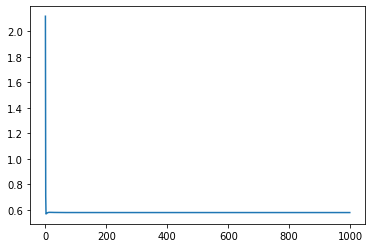

In [2149]:
plt.plot(cost)

In [2150]:
y_ = x.dot(w) + b
sigmoid_function(y_)[0:10]

array([[0.3249552 ],
       [0.61292591],
       [0.36408178],
       [0.57817358],
       [0.2924502 ],
       [0.31069515],
       [0.39929626],
       [0.31168712],
       [0.46187669],
       [0.55347665]])

In [2151]:
def accuracy(x,y,w,b):
    y_pred = x.dot(w)+b
    y_pred = sigmoid_function(y_pred)
    
    y_pred = y_pred > 0.5
    y_pred = np.array(y_pred, dtype = int)
    
    accuracy = (1 - np.sum(np.abs(y-y_pred))/len(y))*100
    
    return accuracy

In [2152]:
accuracy(x,y,w,b)

72.05387205387206

### ACCURACY is -~ 83% using hot encoding

In [2153]:
train_df

,PassengerId,Survived,Pclass,Sex,Age,Cabin,Embarked,Family_size,Married
0,1,0,3,male,22.000000,8,S,1,0
1,2,1,1,female,38.000000,2,C,1,1
2,3,1,3,female,26.000000,8,S,0,0
3,4,1,1,female,35.000000,2,S,1,1
4,5,0,3,male,35.000000,8,S,0,0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,8,S,0,0
887,888,1,1,female,19.000000,1,S,0,0
888,889,0,3,female,29.699118,8,S,3,0
889,890,1,1,male,26.000000,2,C,0,0


In [2154]:
train_df['Sex'] = train_df['Sex'].astype('category')
train_df['Sex'] = train_df['Sex'].cat.codes

In [2155]:
train_df['Age'] = (train_df['Age'] - train_df['Age'].min())/(train_df['Age'].max()-train_df['Age'].min())

In [2156]:
train_df['Pclass'] = train_df['Pclass'].astype('category')
train_df['Pclass'] = train_df['Pclass'].cat.codes

In [2157]:
train_df['Embarked'] = train_df['Embarked'].astype('category')
train_df['Embarked'] = train_df['Embarked'].cat.codes

In [2158]:
train_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [2159]:
x2 = train_df.iloc[0:,2:].to_numpy()
y2 = train_df.iloc[0:,1:2].to_numpy()

In [2160]:
x2.shape

(891, 7)

In [2161]:
w2 = np.random.rand(x2.shape[-1], 1)
b2 = np.random.rand()

In [2162]:
w2 ,b2 ,cost2 = gradient_descent(x2,y2,w2,b2,0.01,50000)

/var/folders/1n/9fbztsyx07jgppwjlx5rfyzm0000gn/T/ipykernel_6492/3932777322.py:2: RuntimeWarning: overflow encountered in exp
  sgmd = (1/(1+np.exp(-x)))
/var/folders/1n/9fbztsyx07jgppwjlx5rfyzm0000gn/T/ipykernel_6492/3301377576.py:11: RuntimeWarning: divide by zero encountered in log
  cost.append((np.sum(y*np.log(y_hat) + (1-y)*np.log(1-y_hat)))/(-n))
/var/folders/1n/9fbztsyx07jgppwjlx5rfyzm0000gn/T/ipykernel_6492/3301377576.py:11: RuntimeWarning: invalid value encountered in multiply
  cost.append((np.sum(y*np.log(y_hat) + (1-y)*np.log(1-y_hat)))/(-n))
/var/folders/1n/9fbztsyx07jgppwjlx5rfyzm0000gn/T/ipykernel_6492/3301377576.py:14: RuntimeWarning: overflow encountered in multiply
  w = w - (-1/n)*(x.T.dot(r))*learning_rate - lamda*learning_rate*w


In [2163]:
w2, b2

(array([[nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan]]),
 nan)

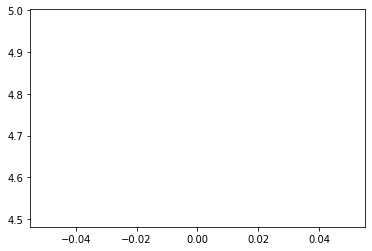

In [2164]:
plt.plot(cost2)

In [2165]:
accuracy(x2,y2,w2,b2)

61.61616161616161

### Accuracy is 81% using label encoding

In [2166]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### Using Test data

In [2167]:
test_df['Embarked'].fillna(value='S', inplace = True)
test_df['Cabin'].fillna(value='Z', inplace=True)
test_df['Age'].fillna(value=train_df['Age'].mean(), inplace=True)
test_df['Family_size'] = test_df['SibSp'] + test_df['Parch']
test_df['Designation'] = test_df.Name.str.extract(' ([A-Za-z]+)\.')
test_df['Designation'] = test_df['Designation'].replace('Ms', 'Miss')
test_df['Designation'] = test_df['Designation'].replace('Mlle', 'Miss')
test_df['Designation'] = test_df['Designation'].replace('Mme', 'Mrs')
encoding_test = {"Designation" : {"Mr" : 1, "Miss" : 2, "Mrs": 3, "Master": 4, "Dr":0, "Rev":0,"Major":0, "Col":0,"Countess":0,"Capt":0,"Sir":0,"Lady":0, "Don":0, "Jonkheer":0}}
test_df = test_df.replace(encoding_test)
for p in [test_df]:
    p['Married'] = 0
    p['Married'].loc[p['Designation'] == 3] = 1 
test_df=test_df.drop(columns=['Name', 'Ticket', 'Fare'])
for q in [test_df]:
    q['Cabin'] = q['Cabin'].str[0]
custom_encoding_test = {'Cabin' : {'A': 0, 'B':1, 'C':2, 'D':3,'E':4, 'F':5, 'G': 6, 'T':7, 'Z':8}}
test_df = test_df.replace(custom_encoding_test)
test_df = test_df.drop(columns='Designation')
test_df = test_df.drop(columns=['SibSp', 'Parch'])



/var/folders/1n/9fbztsyx07jgppwjlx5rfyzm0000gn/T/ipykernel_6492/3910819666.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p['Married'].loc[p['Designation'] == 3] = 1


In [2238]:
test_df

,PassengerId,Pclass,Sex,Age,Cabin,Embarked,Family_size,Married
0,892,3,male,34.500000,8,Q,0,0
1,893,3,female,47.000000,8,S,1,1
2,894,2,male,62.000000,8,Q,0,0
3,895,3,male,27.000000,8,S,0,0
4,896,3,female,22.000000,8,S,2,1
...,...,...,...,...,...,...,...,...
413,1305,3,male,0.367921,8,S,0,0
414,1306,1,female,39.000000,2,C,0,0
415,1307,3,male,38.500000,8,S,0,0
416,1308,3,male,0.367921,8,S,0,0


In [2239]:
hot_encoded_df_test = (pd.get_dummies(test_df, columns=['Pclass', 'Cabin', 'Embarked','Family_size','Married']))
hot_encoded_df_test['Age'] = (hot_encoded_df_test['Age'] - hot_encoded_df_test['Age'].min())/(hot_encoded_df_test['Age'].max()-hot_encoded_df_test['Age'].min())
hot_encoded_df_test['Sex'] = hot_encoded_df_test['Sex'].astype('category')
hot_encoded_df_test['Sex'] = hot_encoded_df_test['Sex'].cat.codes
hot_encoded_df_test.drop(columns=['Cabin_4', 'Cabin_5', 'Cabin_6', 'Cabin_8', 'Family_size_10', 'Family_size_6','Family_size_5','Family_size_4', 'Family_size_7'])

,PassengerId,Sex,Age,Pclass_1,Pclass_2,Pclass_3,Cabin_0,Cabin_1,Cabin_2,Cabin_3,Embarked_C,Embarked_Q,Embarked_S,Family_size_0,Family_size_1,Family_size_2,Family_size_3,Married_0,Married_1
0,892,1,0.452723,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0
1,893,0,0.617566,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1
2,894,1,0.815377,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0
3,895,1,0.353818,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0
4,896,0,0.287881,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,1,0.002610,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0
414,1306,0,0.512066,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0
415,1307,1,0.505473,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0
416,1308,1,0.002610,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0


In [2240]:
x_test = hot_encoded_df_test.iloc[0:,2:].to_numpy()
y_test = hot_encoded_df_test.iloc[0:,1:2].to_numpy()

In [2241]:
w_test = np.random.rand(x_test.shape[-1], 1)
b_test = np.random.rand()

In [2242]:
w_test,b_test,cost_test = gradient_descent(x_test,y_test,w_test,b_test,-0.005,0.8,5000)

/var/folders/1n/9fbztsyx07jgppwjlx5rfyzm0000gn/T/ipykernel_6492/3301377576.py:11: RuntimeWarning: divide by zero encountered in log
  cost.append((np.sum(y*np.log(y_hat) + (1-y)*np.log(1-y_hat)))/(-n))
/var/folders/1n/9fbztsyx07jgppwjlx5rfyzm0000gn/T/ipykernel_6492/3301377576.py:11: RuntimeWarning: invalid value encountered in multiply
  cost.append((np.sum(y*np.log(y_hat) + (1-y)*np.log(1-y_hat)))/(-n))
/var/folders/1n/9fbztsyx07jgppwjlx5rfyzm0000gn/T/ipykernel_6492/3932777322.py:2: RuntimeWarning: overflow encountered in exp
  sgmd = (1/(1+np.exp(-x)))


In [2243]:
yhat = x_test.dot(w_test)+b_test
yhat = sigmoid_function(yhat)
    
yhat = yhat > 0.5
yhat = np.array(yhat, dtype = int)

/var/folders/1n/9fbztsyx07jgppwjlx5rfyzm0000gn/T/ipykernel_6492/3932777322.py:2: RuntimeWarning: overflow encountered in exp
  sgmd = (1/(1+np.exp(-x)))


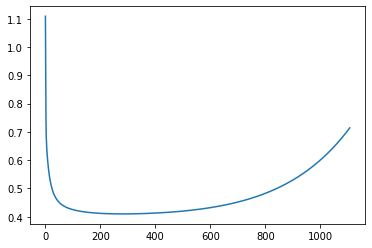

In [2244]:
plt.plot(cost_test)

In [2245]:
w_test, b_test

(array([[ 7.93345661e+04],
        [-8.62652774e+07],
        [-8.57956963e+07],
        [-8.62475219e+07],
        [ 7.80603037e+07],
        [ 7.67432191e+07],
        [ 4.26929323e+07],
        [ 2.22533115e+08],
        [ 1.04636053e+08],
        [ 6.34241534e+07],
        [-5.40986938e+06],
        [ 3.80571537e+07],
        [-2.16376417e+08],
        [-2.16656569e+08],
        [-2.16657961e+08],
        [ 1.07197967e+07],
        [ 1.09984492e+07],
        [ 1.08042172e+07],
        [-4.44235952e+07],
        [ 1.77928452e+08],
        [ 1.06453704e+08],
        [ 1.90301302e+08],
        [ 4.10610615e+07],
        [ 1.14256700e+07],
        [ 2.54132904e+08],
        [-8.62829495e+08]]),
 -298.3530991981859)

In [2246]:
yhat = yhat.flatten()
yhat

array([1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,

In [2247]:
test_df['PassengerId'] = test_df['PassengerId'].to_numpy()

In [2248]:
yhat = yhat.flatten()

In [2249]:
submission_test = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": yhat
    })
submission_test.to_csv('submission_kaggle.csv', index = False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [2250]:
submission_test['Survived'].value_counts()

1    331
0     87
Name: Survived, dtype: int64